🔹 Step 1: Import Libraries & Load Data

In [29]:
# Import Libraries & Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
import joblib

# Load data
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nColumns:", train_df.columns.tolist())

train_df.head()

Train shape: (80000, 10)
Test shape: (20000, 10)

Columns: ['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,Female,80.0,0,1,never,25.19,6.6,140,0
1,1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,2,Male,28.0,0,0,never,27.32,5.7,158,0
3,3,Female,36.0,0,0,current,23.45,5.0,155,0
4,4,Male,76.0,1,1,current,20.14,4.8,155,0


🔹 Step 2: EDA (Exploratory Data Analysis)

Unnamed: 0             0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


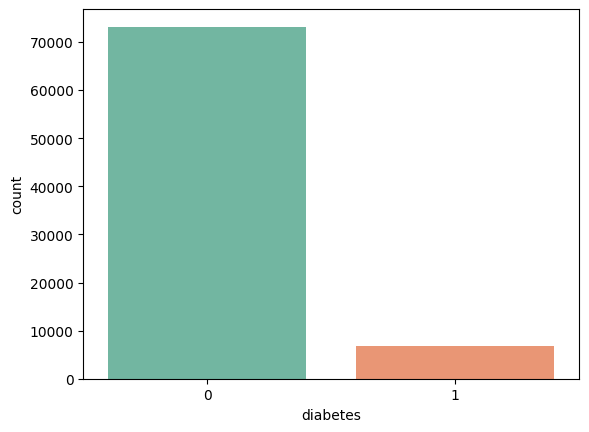

In [30]:
# Check missing values
print(train_df.isnull().sum())

# Target distribution
sns.countplot(x="diabetes", data=train_df, hue="diabetes", palette="Set2", legend=False)
plt.show()

🔹 Step 3: Data Preprocessing

In [31]:
categorical_cols = ["gender", "smoking_history"]
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

train_df[categorical_cols] = encoder.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = encoder.transform(test_df[categorical_cols])

# Features and target
X = train_df.drop(["diabetes", "Unnamed: 0"], axis=1)
y = train_df["diabetes"]

# Train-validation split (no scaling needed for Decision Tree)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

🔹 Step 4: Train Decision Tree Model

In [32]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")
dt_model.fit(X_train, y_train)
print("✅ Decision Tree Model trained successfully")

✅ Decision Tree Model trained successfully


🔹 Step 5: Confusion Matrix (Bonus)

Validation -> Accuracy: 0.8385, Precision: 0.3398, Recall: 0.9473, F1: 0.5002


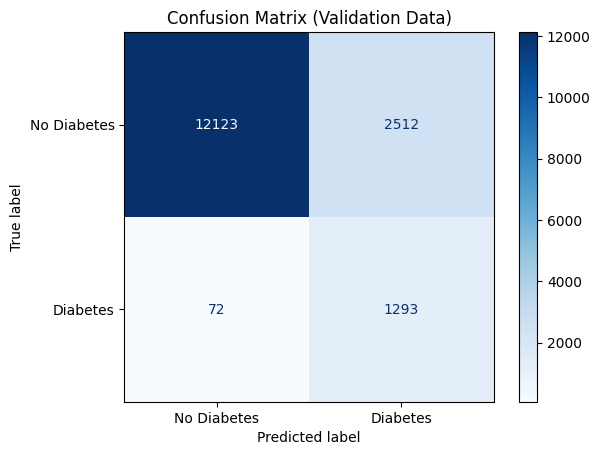

In [33]:
# Validation Performance
y_pred_val = dt_model.predict(X_val)

# Metrics
acc = accuracy_score(y_val, y_pred_val)
prec = precision_score(y_val, y_pred_val)
rec = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print(f"Validation -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes","Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Data)")
plt.show()

🔹 Step 6: Export PDF Report (Bonus)

In [34]:
# Test Performance + Reports
X_test = test_df.drop(["diabetes", "Unnamed: 0"], axis=1)
y_test = test_df["diabetes"]

y_pred_test = dt_model.predict(X_test)

# 1. Classification report
report = classification_report(y_test, y_pred_test, target_names=["No Diabetes", "Diabetes"])

fig, ax = plt.subplots(figsize=(8.5, 11))
ax.axis("off")
ax.set_title("Diabetes Classification Report (Decision Tree - Test Data)",
             fontsize=16, fontweight="bold", pad=20)
ax.text(0, 1, report, fontsize=12, ha="left", va="top", family="monospace")

plt.savefig("DecisionTree_Classification_Report_Test.pdf", bbox_inches="tight")
plt.close()

print("✅ PDF Report saved as 'DecisionTree_Classification_Report_Test.pdf'")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Decision Tree - Test Data)")
plt.savefig("DecisionTree_Confusion_Matrix_Test.pdf", bbox_inches="tight")
plt.close()

print("✅ Confusion Matrix saved as 'DecisionTree_Confusion_Matrix_Test.pdf'")

✅ PDF Report saved as 'DecisionTree_Classification_Report_Test.pdf'
✅ Confusion Matrix saved as 'DecisionTree_Confusion_Matrix_Test.pdf'


In [35]:
import joblib

joblib.dump(dt_model, "DecisionTree_model.pkl")
print("✅ Model saved")

✅ Model saved
